#### Where do healthy people live in the US?
#### Problem Statement
    Understanding key factors correlating with positive health outcomes is important for driving public health policy. Here, we examine factors such as income, access to food (both ”healthy” and ”unhealthy” options), and access to recreational space and their relationship with health indicators such as diabetes rate, heart disease mortality, and life expectancy on the county level. We will also look for signs of racial/ethnic bias in access to health while controlling for potential differences in income. Our findings could function as an initial step towards government funding for public recreational areas, local farmers and markets, and/or grocery stores in counties lacking access.
#### Data Source: 
    USDA ”Food Environment Atlas”.

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data..
##### Combine all sheets from USDA ”Food Environment Atlas”

In [77]:
excel_data = pd.ExcelFile('FoodEnvironmentAtlas.xlsx')
relevant_sheets = ['ACCESS', 'STORES', 'RESTAURANTS', 'ASSISTANCE', 'HEALTH', 'SOCIOECONOMIC']
data_dict = {sheet: excel_data.parse(sheet) for sheet in relevant_sheets}
combined_dataset = data_dict[relevant_sheets[0]].copy()

for sheet in relevant_sheets[1:]:
    combined_dataset = pd.merge(
        combined_dataset,
        data_dict[sheet],
        on=['FIPS', 'State', 'County'],
        how='inner'
    )
print("Combined Dataset Shape:", combined_dataset.shape)
print("Combined Dataset Columns:", combined_dataset.columns)

Combined Dataset Shape: (3143, 176)
Combined Dataset Columns: Index(['FIPS', 'State', 'County', 'LACCESS_POP10', 'LACCESS_POP15',
       'PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15',
       'LACCESS_LOWI10', 'LACCESS_LOWI15',
       ...
       'PCT_NHPI10', 'PCT_65OLDER10', 'PCT_18YOUNGER10', 'MEDHHINC15',
       'POVRATE15', 'PERPOV10', 'CHILDPOVRATE15', 'PERCHLDPOV10', 'METRO13',
       'POPLOSS10'],
      dtype='object', length=176)


#### Preform EDA on all columns

In [3]:
eda_combined_dataset = {
    'shape': combined_dataset.shape,
    'columns': combined_dataset.columns.tolist(),
    'data_types': combined_dataset.dtypes,
    'missing_values': combined_dataset.isnull().sum(),
    'summary_statistics': combined_dataset.describe(include='all')
}
print("Shape of the dataset:", eda_combined_dataset['shape'])

Shape of the dataset: (3143, 176)


In [4]:
print("\nColumn Names:", eda_combined_dataset['columns'])


Column Names: ['FIPS', 'State', 'County', 'LACCESS_POP10', 'LACCESS_POP15', 'PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15', 'LACCESS_LOWI10', 'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15', 'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10', 'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV10', 'PCT_LACCESS_HHNV15', 'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15', 'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15', 'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS10', 'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15', 'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15', 'LACCESS_WHITE15', 'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15', 'LACCESS_HISP15', 'PCT_LACCESS_HISP15', 'LACCESS_NHASIAN15', 'PCT_LACCESS_NHASIAN15', 'LACCESS_NHNA15', 'PCT_LACCESS_NHNA15', 'LACCESS_NHPI15', 'PCT_LACCESS_NHPI15', 'LACCESS_MULTIR15', 'PCT_LACCESS_MULTIR15', 'GROC11', 'GROC16', 'PCH_GROC_11_16', 'GROCPTH11', 'GROCPTH16', 'PCH_GROCPTH_11_16

In [5]:
print("\nData Types:\n", eda_combined_dataset['data_types'])


Data Types:
 FIPS                int64
State              object
County             object
LACCESS_POP10     float64
LACCESS_POP15     float64
                   ...   
PERPOV10            int64
CHILDPOVRATE15    float64
PERCHLDPOV10        int64
METRO13             int64
POPLOSS10         float64
Length: 176, dtype: object


In [6]:
print("\nMissing Values:\n", eda_combined_dataset['missing_values'][eda_combined_dataset['missing_values']>0])


Missing Values:
 LACCESS_POP15              19
PCH_LACCESS_POP_10_15      26
PCT_LACCESS_POP15          19
LACCESS_LOWI15             20
PCH_LACCESS_LOWI_10_15     28
                         ... 
PCH_RECFACPTH_11_16       143
MEDHHINC15                  4
POVRATE15                   4
CHILDPOVRATE15              4
POPLOSS10                   2
Length: 79, dtype: int64


In [7]:
print("\nSummary Statistics:\n", eda_combined_dataset['summary_statistics'])


Summary Statistics:
                 FIPS State      County  LACCESS_POP10  LACCESS_POP15  \
count    3143.000000  3143        3143    3143.000000    3124.000000   
unique           NaN    51        1832            NaN            NaN   
top              NaN    TX  Washington            NaN            NaN   
freq             NaN   254          31            NaN            NaN   
mean    30390.411709   NaN         NaN   20156.653242   19287.747386   
std     15164.717720   NaN         NaN   51308.865791   47803.525596   
min      1001.000000   NaN         NaN       0.000000       0.000000   
25%     18178.000000   NaN         NaN    1661.076794    1631.358726   
50%     29177.000000   NaN         NaN    4097.827186    4131.174278   
75%     45082.000000   NaN         NaN   12954.123206   13119.029389   
max     56045.000000   NaN         NaN  886068.668386  740267.412661   

        PCH_LACCESS_POP_10_15  PCT_LACCESS_POP10  PCT_LACCESS_POP15  \
count            3.117000e+03        3143.

#### Correlation analysis and heatmap

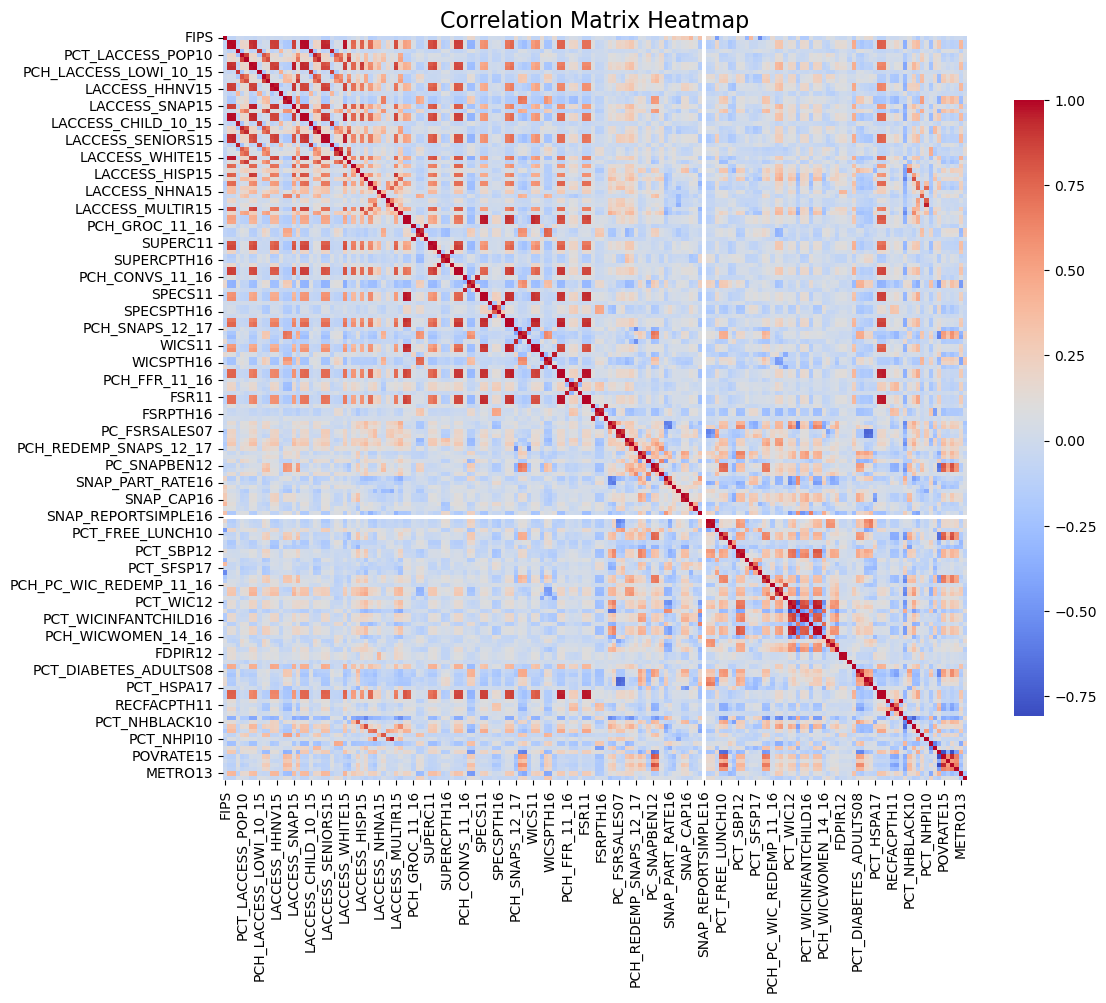

C:\Users\alsae\AppData\Local\Temp\ipykernel_5880\3486400848.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


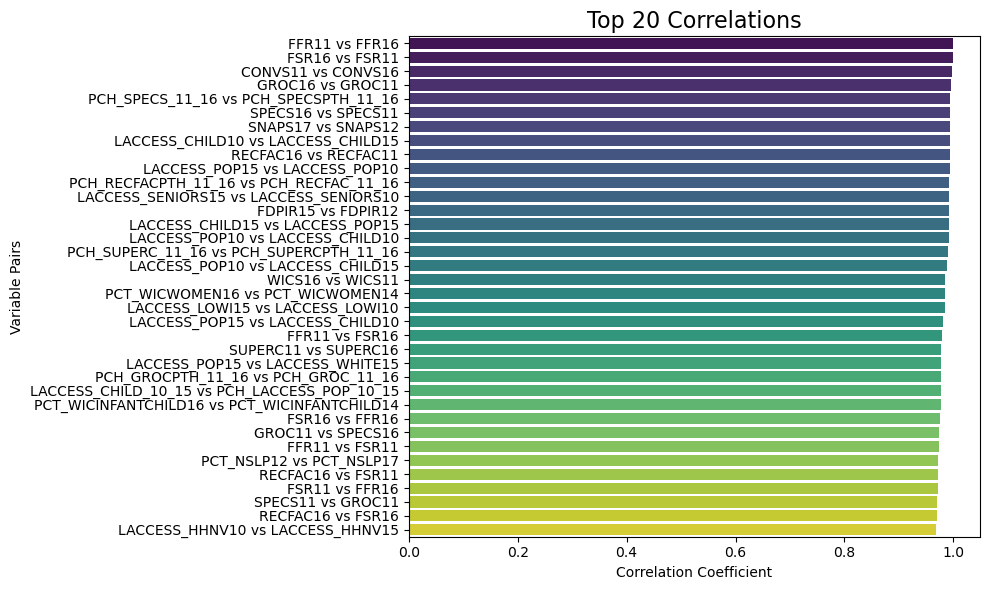

In [8]:
numeric_data = combined_dataset.select_dtypes(include=['float64', 'int64']).dropna()
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    cmap='coolwarm', 
    annot=False,
    fmt=".2f",
    square=True, 
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

top_correlations = correlation_matrix.unstack().sort_values(ascending=False)
top_correlations = top_correlations[top_correlations != 1]
top_correlations = top_correlations.drop_duplicates().head(36)

top_corrs_df = top_correlations.reset_index()
top_corrs_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Correlation', 
    y=top_corrs_df['Variable 1'] + ' vs ' + top_corrs_df['Variable 2'], 
    data=top_corrs_df,
    palette='viridis'
)
plt.title('Top 20 Correlations', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variable Pairs')
plt.tight_layout()
plt.show()

#### PCA and feature selection

In [35]:
health_outcome = 'PCT_OBESE_ADULTS15'

if health_outcome in numeric_data.columns:
    correlated_features = correlation_matrix[health_outcome].abs().sort_values(ascending=False)
    top_correlated_columns = correlated_features.head(36).index.tolist()
else:
    top_correlated_columns = numeric_data.columns.tolist()[:36]

scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_data[top_correlated_columns])

pca = PCA(n_components=36)
pca_data = pca.fit_transform(standardized_data)

pca_columns = [f'PC{i+1}' for i in range(36)]
reduced_dataset = pd.DataFrame(pca_data, columns=pca_columns)

In [94]:
reduced_dataset=combined_dataset[top_correlated_columns]
reduced_dataset.describe(include='all')

,FIPS,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,...,PCT_LACCESS_SENIORS10,PCT_LACCESS_SENIORS15,LACCESS_WHITE15,PCT_LACCESS_WHITE15,LACCESS_BLACK15,PCT_LACCESS_BLACK15,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15
count,3143.000000,3143.000000,3124.000000,3.117000e+03,3143.000000,3124.000000,3143.000000,3123.000000,3.115000e+03,3143.000000,...,3143.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000
mean,30390.411709,20156.653242,19287.747386,7.180008e+03,23.559330,23.084470,5551.776559,5833.959524,7.318957e+03,8.374953,...,3.915474,3.791364,14769.991630,18.976973,2269.428677,1.879652,2326.081648,2.021269,695.064178,0.249350
std,15164.717720,51308.865791,47803.525596,3.955676e+05,20.250176,19.602745,13862.922934,13989.348252,4.004692e+05,8.214988,...,4.215192,3.967098,35114.751058,17.529867,8793.761183,4.139239,12159.928409,5.030497,3466.438554,0.693856
min,1001.000000,0.000000,0.000000,-1.000000e+02,0.000000,0.000000,0.000000,0.000000,-1.000000e+02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18178.000000,1661.076794,1631.358726,-1.091343e+01,10.847099,10.927326,592.983070,608.235919,-1.232638e+01,3.442171,...,1.585764,1.634053,1317.210782,8.518008,7.000000,0.056762,31.131894,0.197446,3.328667,0.027088
50%,29177.000000,4097.827186,4131.174278,-6.239322e-02,19.685956,19.200682,1500.780036,1636.858816,3.486028e+00,6.150772,...,2.827295,2.769164,3350.954204,15.185443,86.612488,0.257221,136.051404,0.579669,16.473665,0.085588
75%,45082.000000,12954.123206,13119.029389,7.262080e+00,29.581054,28.862231,4591.067541,4859.016156,2.352342e+01,10.324935,...,4.521918,4.403062,10672.119575,23.658599,1007.743296,1.682592,874.891533,1.673132,130.916653,0.249311
max,56045.000000,886068.668386,740267.412661,2.208376e+07,100.000001,100.000001,292541.789025,259479.516033,2.234893e+07,72.274456,...,29.208633,29.146426,413148.285289,99.163179,167913.190404,50.136324,263440.500070,79.323968,76998.348562,25.087551


#### EDA on reduced columns

In [59]:
eda_reduced_dataset = {
    'shape': reduced_dataset.shape,
    'columns': reduced_dataset.columns.tolist(),
    'data_types': reduced_dataset.dtypes,
    'missing_values': reduced_dataset.isnull().sum(),
    'summary_statistics': reduced_dataset.describe(include='all')
}

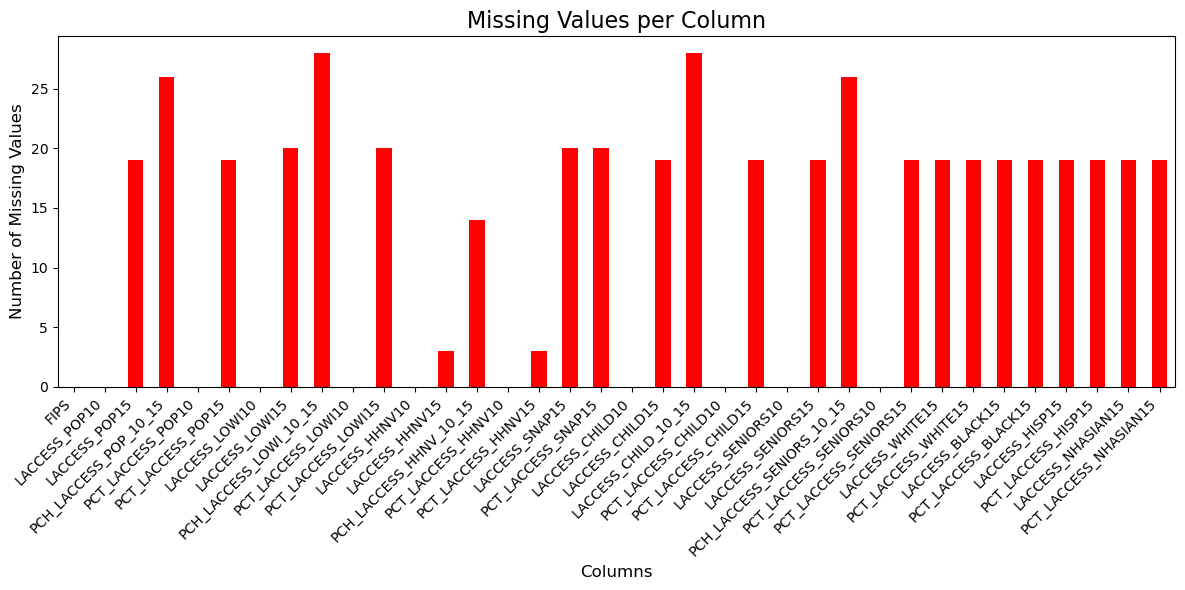

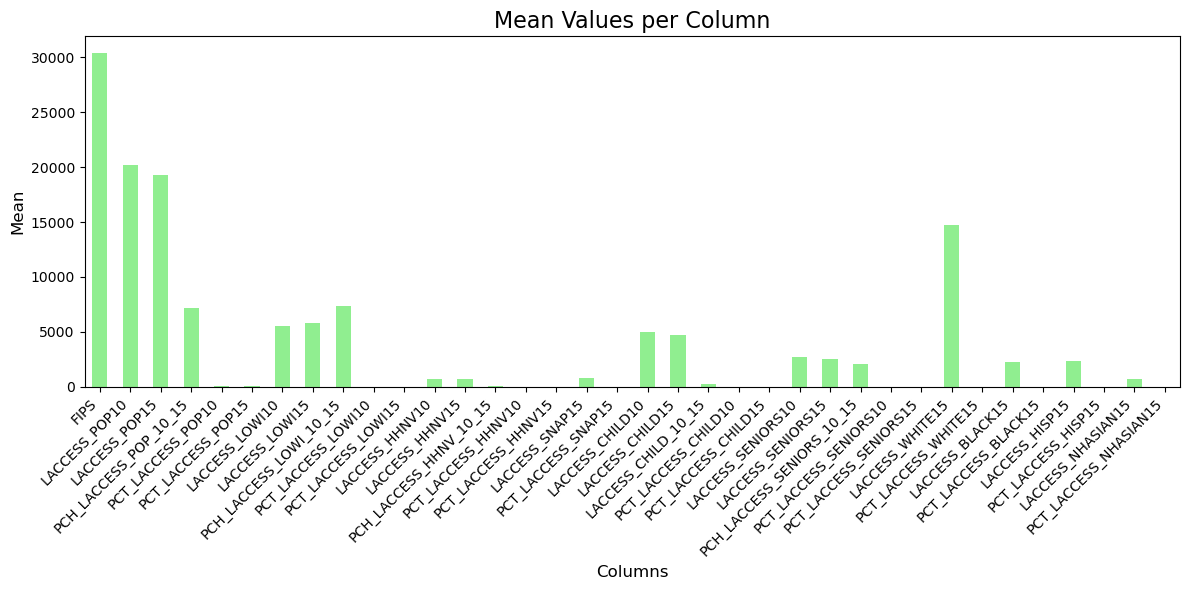

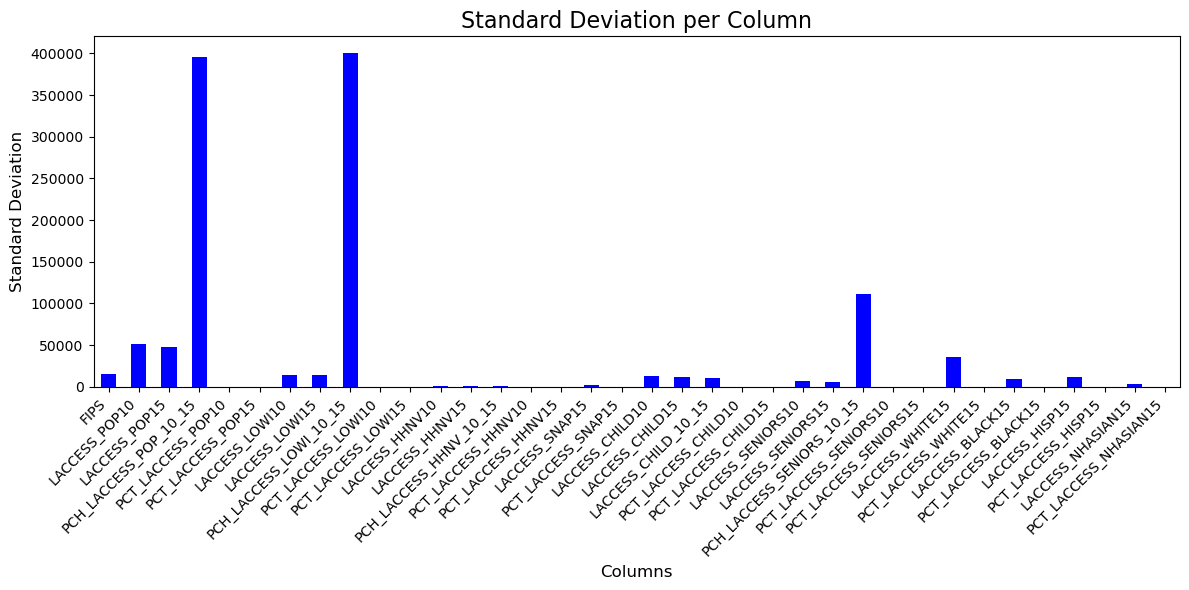

In [61]:
#missing values
plt.figure(figsize=(12, 6))
missing_values = eda_reduced_dataset['missing_values']
missing_values.plot(kind='bar', color='red')
plt.title("Missing Values per Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Missing Values", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#summary statistics
summary_stats = eda_reduced_dataset['summary_statistics']

#means
plt.figure(figsize=(12, 6))
summary_stats.loc['mean'].plot(kind='bar', color='lightgreen')
plt.title("Mean Values per Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Mean", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#standard deviations
plt.figure(figsize=(12, 6))
summary_stats.loc['std'].plot(kind='bar', color='blue')
plt.title("Standard Deviation per Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Standard Deviation", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()